##**Import Necessary Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

**Load Dataset**

In [2]:
df = pd.read_csv('student_habits_performance.csv')

In [6]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


##**Plots**

**1. Scores Distribution (Histogram)**

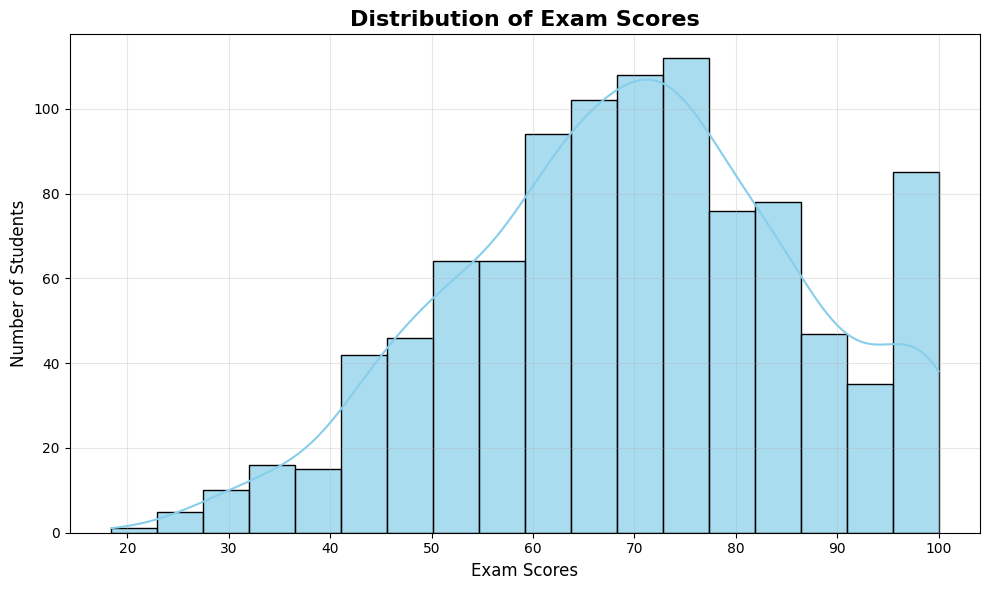

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='exam_score', kde=True, color='skyblue', alpha=0.7)
plt.title('Distribution of Exam Scores', fontsize=16, fontweight='bold')
plt.xlabel('Exam Scores', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**2. Study Hours vs. Exam Score (Scatter Plot)**

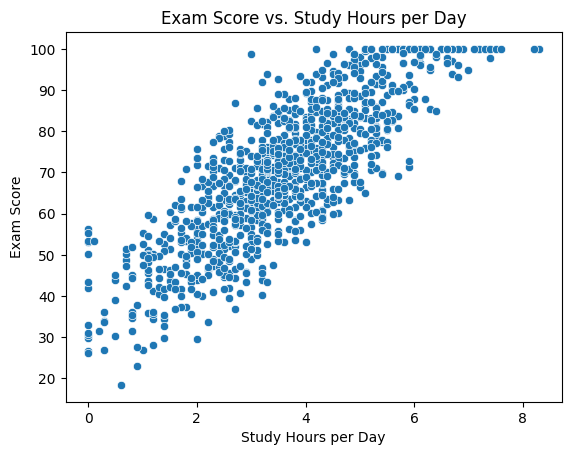

In [7]:
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score')
plt.title("Exam Score vs. Study Hours per Day")
plt.xlabel("Study Hours per Day")
plt.ylabel("Exam Score")
plt.show()

**3. Gender Distribution (Box plot)**

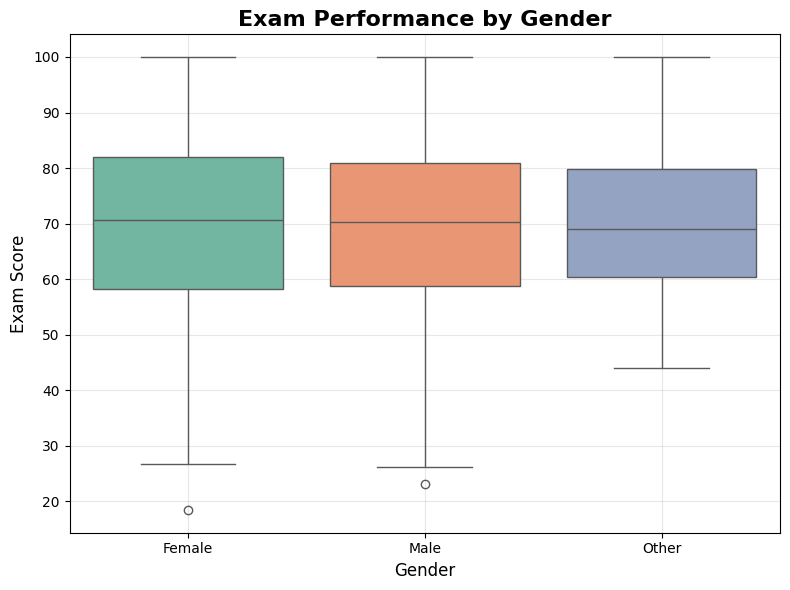

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='gender', y='exam_score', palette='Set2')
plt.title('Exam Performance by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**4. Exam Scores vs. Sleep Hours (Scatter Plot)**

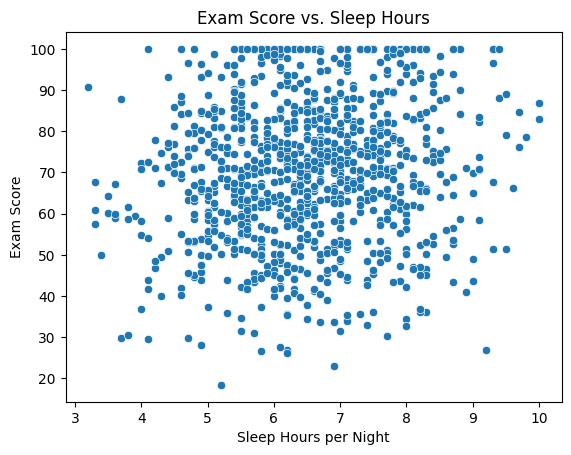

In [12]:
sns.scatterplot(data=df, x='sleep_hours', y='exam_score')
plt.title("Exam Score vs. Sleep Hours")
plt.xlabel("Sleep Hours per Night")
plt.ylabel("Exam Score")
plt.show()

**5. Exam scores and mental health (BoxPlot)**

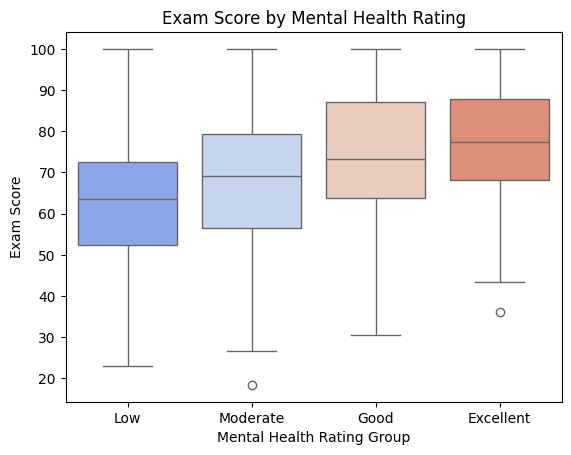

In [11]:
df['mental_group'] = pd.cut(df['mental_health_rating'], bins=[0,3,6,8,10], labels=["Low","Moderate","Good","Excellent"])
sns.boxplot(data=df, x='mental_group', y='exam_score', palette='coolwarm')
plt.title("Exam Score by Mental Health Rating")
plt.xlabel("Mental Health Rating Group")
plt.ylabel("Exam Score")
plt.show()

**6. Exercise days per week and Exam Scores (Barplot)**

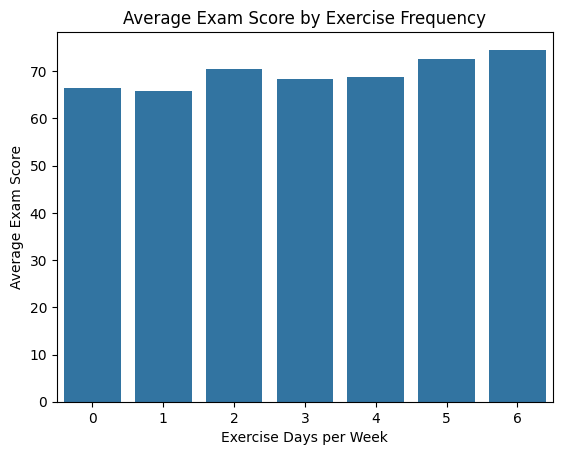

In [14]:
avg_by_ex = df.groupby('exercise_frequency')['exam_score'].mean().reset_index()
sns.barplot(data=avg_by_ex, x='exercise_frequency', y='exam_score')
plt.title("Average Exam Score by Exercise Frequency")
plt.xlabel("Exercise Days per Week")
plt.ylabel("Average Exam Score")
plt.show()

**7. Correlation Matrix**

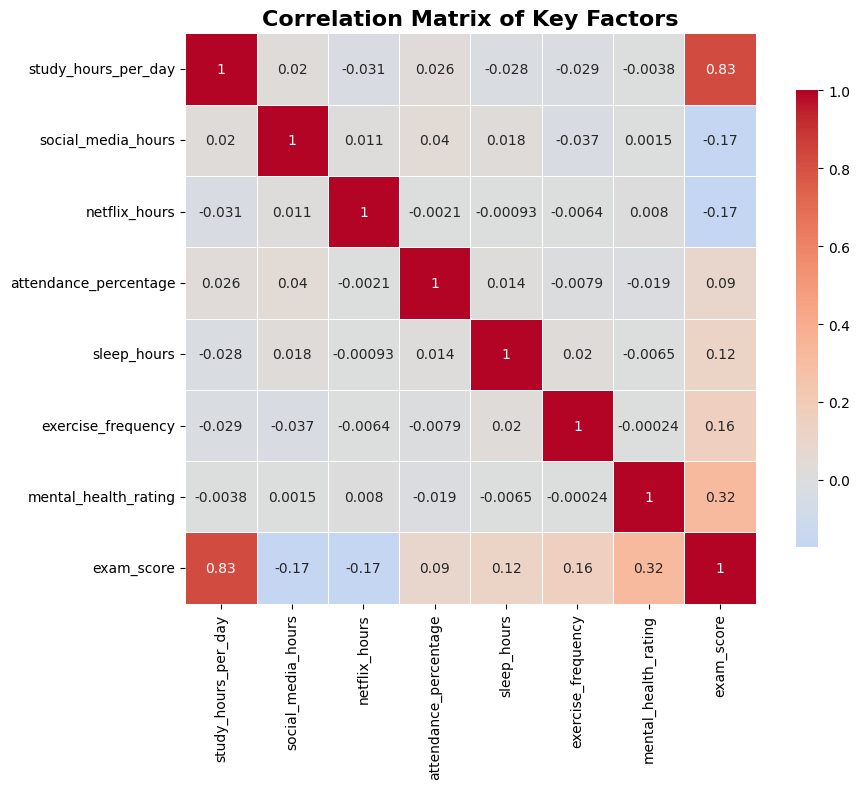

In [15]:
numerical_cols = ['study_hours_per_day', 'social_media_hours', 'netflix_hours',
                 'attendance_percentage', 'sleep_hours', 'exercise_frequency',
                 'mental_health_rating', 'exam_score']
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
           square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Key Factors', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**8. Average Exam Scores By Age**

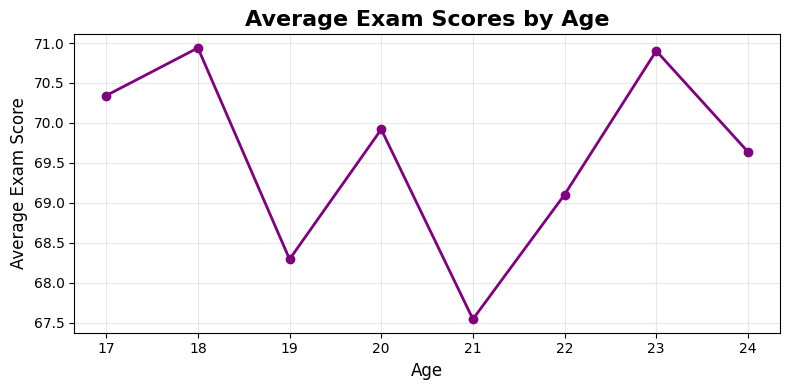

In [17]:
age_scores = df.groupby('age')['exam_score'].mean()
plt.figure(figsize=(8, 4))
plt.plot(age_scores.index, age_scores.values, marker='o', color='purple', linewidth=2)
plt.title('Average Exam Scores by Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Exam Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**9. Sleep Hours vs Exam Performance SHOWN BY MENTAL HEALTH(Scatter Plot)**

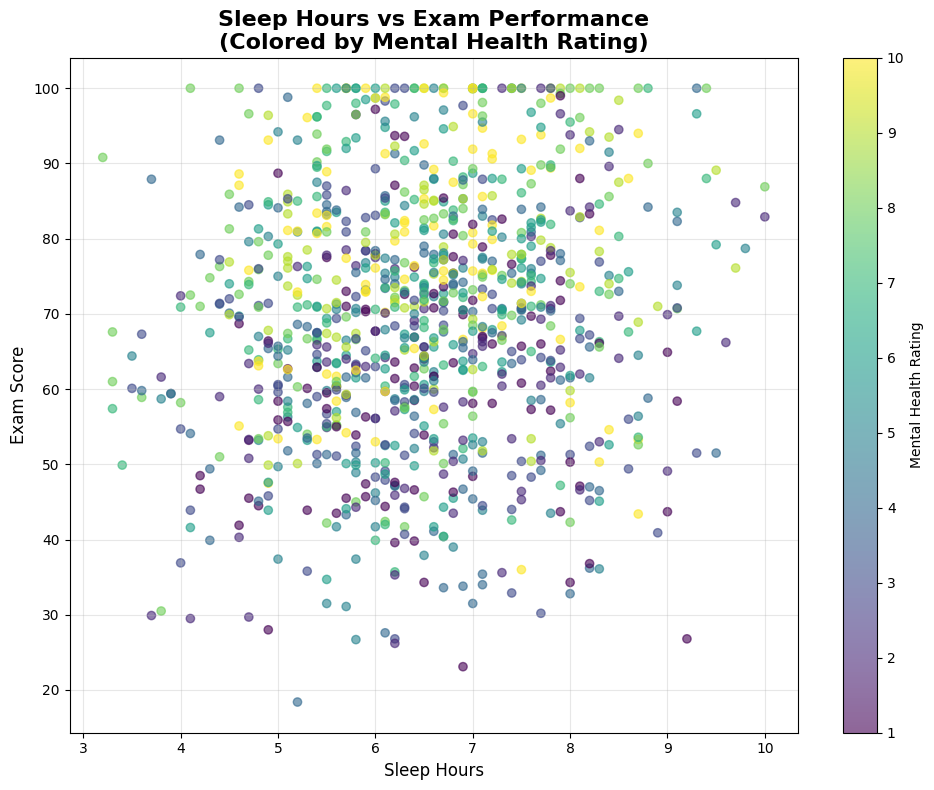

In [18]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['sleep_hours'], df['exam_score'],
                     c=df['mental_health_rating'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Mental Health Rating')
plt.title('Sleep Hours vs Exam Performance\n(Colored by Mental Health Rating)',
          fontsize=16, fontweight='bold')
plt.xlabel('Sleep Hours', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()